In [51]:
%matplotlib inline
import pandas as pd

from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [52]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

<Figure size 1440x1280 with 0 Axes>

In [53]:
consumption = pd.read_csv('data/2000-2014_fixed.csv', encoding='ascii', skiprows=0)


In [54]:
consumption.head()

YEAR   MAKE    MODEL VEHICLE CLASS  ENGINE SIZE  CYLINDERS TRANSMISSION  \
0  2000  ACURA    1.6EL       COMPACT          1.6          4           A4   
1  2000  ACURA    1.6EL       COMPACT          1.6          4           M5   
2  2000  ACURA    3.2TL      MID-SIZE          3.2          6          AS5   
3  2000  ACURA    3.5RL      MID-SIZE          3.5          6           A4   
4  2000  ACURA  INTEGRA    SUBCOMPACT          1.8          4           A4   

  FUEL  CITY  HWY  COMBO  CO2  
0    X   9.2  6.7    8.1  186  
1    X   8.5  6.5    7.6  175  
2    Z  12.2  7.4   10.0  230  
3    Z  13.4  9.2   11.5  264  
4    X  10.0  7.0    8.6  198

In [55]:
c = consumption

ENGINE SIZE  CYLINDERS       CITY       HWY      COMBO  \
YEAR MAKE                                                               
2000 ACURA        2.388889   4.888889  11.044444  7.655556   9.511111   
     AUDI         2.545455   5.454545  12.568182  8.309091  10.640909   
     BMW          3.310345   6.758621  13.110345  8.582759  11.072414   
     BUICK        3.683333   6.000000  12.616667  7.616667  10.350000   
     CADILLAC     4.500000   7.600000  14.800000  9.300000  12.340000   

                      CO2  
YEAR MAKE                  
2000 ACURA     218.777778  
     AUDI      244.590909  
     BMW       254.724138  
     BUICK     238.166667  
     CADILLAC  284.000000

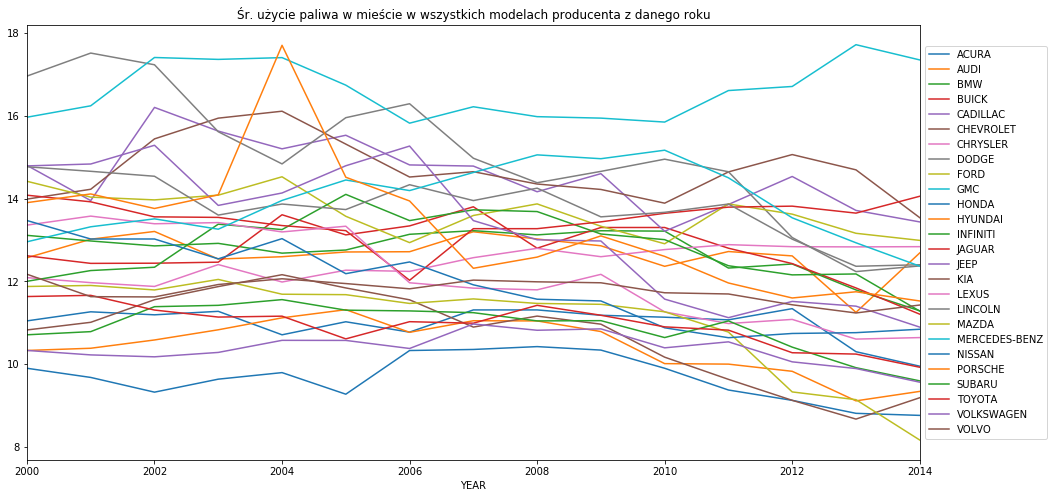

In [75]:
g = c.groupby(['YEAR','MAKE']).mean()
# Sortowanie po roku z którego są dane
g = g.sort_index()
# Pivot tabeli -> przesunięcie producenta jako kolumny
g = g.unstack('MAKE')
# Pominięcie producentów z brakującymi danymi w przedziale 2000-2014
g = g.dropna(axis=1)

plt.rcParams['figure.figsize'] = [16, 8]
g.plot(y='CITY', title='Śr. użycie paliwa w mieście w wszystkich modelach producenta z danego roku',
       legend=False)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
